# Анализ поведения клиентов для телеком компании

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

## Шаг 1. Импорт данных

In [2]:
#считывание файлов
calls_df = pd.read_csv("/datasets/calls.csv")
internet_df = pd.read_csv("/datasets/internet.csv")
messages_df = pd.read_csv("/datasets/messages.csv")
tariffs_df = pd.read_csv("/datasets/tariffs.csv")
users_df = pd.read_csv("/datasets/users.csv")

In [3]:
#выводим информацию по каждой таблице
data_list=[calls_df, internet_df, messages_df, tariffs_df, users_df]
for data in data_list:
    print(data.info())
    display(data.head(15))
    print()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB
None


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
5,1000_5,2018-11-02,0.00,1000
6,1000_6,2018-10-18,0.00,1000
7,1000_7,2018-08-22,18.31,1000
8,1000_8,2018-09-15,18.44,1000
9,1000_9,2018-08-15,0.00,1000



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB
None


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
5,5,1000_5,399.97,2018-10-02,1000
6,6,1000_6,540.08,2018-09-07,1000
7,7,1000_7,415.70,2018-07-11,1000
8,8,1000_8,505.40,2018-10-08,1000
9,9,1000_9,345.54,2018-09-03,1000



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB
None


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
5,1000_5,2018-06-20,1000
6,1000_6,2018-11-19,1000
7,1000_7,2018-10-29,1000
8,1000_8,2018-06-25,1000
9,1000_9,2018-12-18,1000



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes
None


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
None


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,NaN,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,NaN,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,NaN,Пермь,Василиса,Блинова,2018-03-22,smart


Перед работой с данными нужна предобработка.

<b>Таблица calls:</b>
- преобразование даты в формат даты
- очень много звонков с длительностью 0.0. Если у нас в таблице только состоявшиеся звоник (без "недозвонов"), то такого быть не может. Рассчитаем медиану для каждого user_id и заполним пропуски по медиане.

<b>Таблица internet:</b>
- преобразование даты в формат даты
- заполнение нулей по медиане

<b>Таблица messages:</b>
- преобразование даты в формат даты

<b>Таблица tariffs:</b>
- преобразований не требуется

<b>Таблица users:</b>
- преобразование даты в формат даты

In [4]:
</div>#обрабатываем данные в таблице calls
calls_df['call_date'] = pd.to_datetime(calls_df['call_date'], format="%Y-%m-%d")
user_id_list = calls_df['user_id'].drop_duplicates()
for id in user_id_list:
    median_duration = calls_df.loc[(calls_df['duration'] > 0) & 
                (calls_df['user_id'] == id)].sort_values(by='duration')['duration'].median()
    calls_df.loc[(calls_df['duration'] == 0) & (calls_df['user_id'] == id),'duration'] = median_duration
calls_df.info()
display(calls_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null datetime64[ns]
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 6.2+ MB


,id,call_date,duration,user_id
0,1000_0,2018-07-25,7.60,1000
1,1000_1,2018-08-17,7.60,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [5]:
#преобразовываем таблицу internet
internet_df['session_date'] = pd.to_datetime(internet_df['session_date'], format="%Y-%m-%d")
user_id_list = internet_df['user_id'].drop_duplicates()
for id in user_id_list:
    median_traffic = internet_df.loc[(internet_df['mb_used'] > 0) & 
                (internet_df['user_id'] == id)].sort_values(by='mb_used')['mb_used'].median()
    internet_df.loc[(internet_df['mb_used'] == 0) & (internet_df['user_id'] == id),'mb_used'] = median_traffic
internet_df.info()
display(internet_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null datetime64[ns]
user_id         149396 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 5.7+ MB


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [6]:
#преобразовываем таблицы messages и users
messages_df['message_date'] = pd.to_datetime(messages_df['message_date'], format="%Y-%m-%d")
users_df['churn_date'] = pd.to_datetime(users_df['churn_date'], format="%Y-%m-%d")
users_df['reg_date'] = pd.to_datetime(users_df['reg_date'], format="%Y-%m-%d")
users_df['reg_month'] = users_df['reg_date'].dt.month.astype(int)
users_df['churn_month'] = users_df['churn_date'].dt.month
users_df['churn_month'] = users_df['churn_month'].fillna(0)
print(messages_df.info())
print(users_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null datetime64[ns]
user_id         123036 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.8+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
user_id        500 non-null int64
age            500 non-null int64
churn_date     38 non-null datetime64[ns]
city           500 non-null object
first_name     500 non-null object
last_name      500 non-null object
reg_date       500 non-null datetime64[ns]
tariff         500 non-null object
reg_month      500 non-null int64
churn_month    500 non-null float64
dtypes: datetime64[ns](2), float64(1), int64(3), object(4)
memory usage: 39.2+ KB
None


Далее для каждого пользователя необходимо рассчитать:
- количество сделанных звонков и израсходованных минут разговора по месяцам;
- количество отправленных сообщений по месяцам;
- объем израсходованного интернет-трафика по месяцам;
- помесячную выручку с каждого пользователя (вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножьте на значение из тарифного плана; прибавьте абонентскую плату, соответствующую тарифному плану).

In [7]:
#добавляем столбцы месяца в таблицы звонков, сообщений и интернета
calls_df['month_date'] = calls_df['call_date'].dt.month
messages_df['month_date'] = messages_df['message_date'].dt.month
internet_df['month_date'] = internet_df['session_date'].dt.month

#строим сводные таблицы: строки - id пользователя, столбцы - месяцы, значения - количество звонков, минут, сообщений и трафика
calls_pt = calls_df.pivot_table(index = ['month_date', 'user_id'], values='duration', aggfunc=['count', sum])
messages_pt = messages_df.pivot_table(index = ['month_date', 'user_id'], values='id', aggfunc='count')
internet_pt = internet_df.pivot_table(index=['month_date', 'user_id'], values='mb_used', aggfunc='sum')

print('Количество и длительность звонков:')
display(calls_pt.head())
print('Количество сообщений:')
display(messages_pt.head())
print('Количество трафика интернет:')
display(internet_pt.head())

Количество и длительность звонков:


count      sum
                   duration duration
month_date user_id                  
1          1005          15  123.170
           1032          61  488.785
           1045           1    8.330
           1055          64  660.040
           1071          24  230.880

Количество сообщений:


id
month_date user_id    
1          1005      7
           1032     38
           1045      5
           1055     30
           1071     16

Количество трафика интернет:


mb_used
month_date user_id          
1          1005      2727.97
           1032     28090.11
           1045      2346.71
           1055     18614.92
           1071     16662.77

In [8]:
#переименуем столбцы и сводим в одну таблицу
calls_pt.columns = ['calls_amount', 'minutes_used']
messages_pt.columns = ['sms_used']
internet_pt.columns = ['mb_used']
users_df.columns = [
    'user_id',
    'age',
    'churn_date',
    'city',
    'first_name',
    'last_name',
    'reg_date',
    'tariff_name',
    'reg_month',
    'churn_month'
]
calls_pt['minutes_used'] = np.ceil(calls_pt['minutes_used']) #минуты округляются вверх

total_data = pd.DataFrame(calls_pt.to_records()) #temp_df
total_data = total_data.merge(messages_pt, on=['month_date', 'user_id'])
total_data = total_data.merge(internet_pt, on=['month_date', 'user_id'])
total_data = total_data.merge(users_df, on='user_id')
total_data = total_data.merge(tariffs_df, on='tariff_name')

#переводим Мб в Гб
total_data['gb_used'] = np.ceil(total_data['mb_used'] / 1024)
total_data['gb_per_month_included'] = total_data['mb_per_month_included'] / 1024

total_data

,month_date,user_id,calls_amount,minutes_used,sms_used,mb_used,age,churn_date,city,first_name,...,churn_month,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,gb_used,gb_per_month_included
0,1,1005,15,124.0,7,2727.970,67,NaT,Набережные Челны,Афанасий,...,0.0,50,15360,500,550,200,3,3,3.0,15.0
1,2,1005,69,540.0,38,8111.970,67,NaT,Набережные Челны,Афанасий,...,0.0,50,15360,500,550,200,3,3,8.0,15.0
2,3,1005,77,687.0,56,12196.310,67,NaT,Набережные Челны,Афанасий,...,0.0,50,15360,500,550,200,3,3,12.0,15.0
3,4,1005,101,864.0,41,11535.840,67,NaT,Набережные Челны,Афанасий,...,0.0,50,15360,500,550,200,3,3,12.0,15.0
4,5,1005,73,655.0,42,9685.630,67,NaT,Набережные Челны,Афанасий,...,0.0,50,15360,500,550,200,3,3,10.0,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2662,12,1192,140,1227.0,35,9499.580,41,NaT,Сургут,Степан,...,0.0,1000,30720,3000,1950,150,1,1,10.0,30.0
2663,12,1234,113,966.0,91,31573.505,54,NaT,Магнитогорск,Роксана,...,0.0,1000,30720,3000,1950,150,1,1,31.0,30.0
2664,12,1336,100,860.0,20,27726.270,27,NaT,Уфа,Авксентий,...,0.0,1000,30720,3000,1950,150,1,1,28.0,30.0
2665,12,1349,118,997.0,75,29363.470,67,NaT,Севастополь,Гайдар,...,0.0,1000,30720,3000,1950,150,1,1,29.0,30.0


In [9]:
#считаем прибыль
total_data['income_calls'] = ((total_data['minutes_used'] - total_data['minutes_included']) * 
                              total_data['rub_per_minute'])
total_data['income_messages'] = ((total_data['sms_used'] - total_data['messages_included']) * 
                                total_data['rub_per_message'])
total_data['income_internet'] = ((total_data['gb_used'] - total_data['gb_per_month_included']) *
                                total_data['rub_per_gb'])

total_data.loc[total_data['income_calls'] < 0, 'income_calls'] = 0
total_data.loc[total_data['income_messages'] < 0, 'income_messages'] = 0
total_data.loc[total_data['income_internet'] < 0, 'income_internet'] = 0
total_data['income_total'] = (total_data['income_calls'] + total_data['income_messages'] + 
                              total_data['income_internet'] + total_data['rub_monthly_fee'])
#там, где месяц оказания услуги меньше месяца регистрации и больше месяца расторжения - ставим 0
total_data.loc[total_data['month_date'] < total_data['reg_month'], 'income_total'] = 0
total_data.loc[(total_data['month_date'] > total_data['churn_month']) & 
              (total_data['churn_month'] > 0), 'income_total'] = 0

In [10]:
total_data

,month_date,user_id,calls_amount,minutes_used,sms_used,mb_used,age,churn_date,city,first_name,...,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,gb_used,gb_per_month_included,income_calls,income_messages,income_internet,income_total
0,1,1005,15,124.0,7,2727.970,67,NaT,Набережные Челны,Афанасий,...,550,200,3,3,3.0,15.0,0.0,0,0.0,550.0
1,2,1005,69,540.0,38,8111.970,67,NaT,Набережные Челны,Афанасий,...,550,200,3,3,8.0,15.0,120.0,0,0.0,670.0
2,3,1005,77,687.0,56,12196.310,67,NaT,Набережные Челны,Афанасий,...,550,200,3,3,12.0,15.0,561.0,18,0.0,1129.0
3,4,1005,101,864.0,41,11535.840,67,NaT,Набережные Челны,Афанасий,...,550,200,3,3,12.0,15.0,1092.0,0,0.0,1642.0
4,5,1005,73,655.0,42,9685.630,67,NaT,Набережные Челны,Афанасий,...,550,200,3,3,10.0,15.0,465.0,0,0.0,1015.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2662,12,1192,140,1227.0,35,9499.580,41,NaT,Сургут,Степан,...,1950,150,1,1,10.0,30.0,0.0,0,0.0,1950.0
2663,12,1234,113,966.0,91,31573.505,54,NaT,Магнитогорск,Роксана,...,1950,150,1,1,31.0,30.0,0.0,0,150.0,2100.0
2664,12,1336,100,860.0,20,27726.270,27,NaT,Уфа,Авксентий,...,1950,150,1,1,28.0,30.0,0.0,0,0.0,1950.0
2665,12,1349,118,997.0,75,29363.470,67,NaT,Севастополь,Гайдар,...,1950,150,1,1,29.0,30.0,0.0,0,0.0,1950.0


## Шаг 3. Анализ данных

Опишите поведение клиентов оператора, исходя из выборки. Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц? Посчитайте среднее количество, дисперсию и стандартное отклонение. Постройте гистограммы. Опишите распределения.

In [11]:
#отбираем датафреймы
df_smart_total = total_data.query("tariff_name == 'smart'")
df_ultra_total = total_data.query("tariff_name == 'ultra'")

In [12]:
#считаем среднее, дисперсию и стандартное отклонение
#звонки, тариф Смарт
smart_calls_mean = df_smart_total['minutes_used'].mean()
smart_calls_variance = np.var(df_smart_total['minutes_used'])
smart_calls_std_deviance = np.std(df_smart_total['minutes_used'])

#СМС, тариф Смарт
smart_sms_mean = df_smart_total['sms_used'].mean()
smart_sms_variance = np.var(df_smart_total['sms_used'])
smart_sms_std_deviance = np.std(df_smart_total['sms_used'])

#Интернет, тариф Смарт
smart_internet_mean = df_smart_total['gb_used'].mean()
smart_internet_variance = np.var(df_smart_total['gb_used'])
smart_internet_std_deviance = np.std(df_smart_total['gb_used'])

#звонки, тариф Ультра
ultra_calls_mean = df_ultra_total['minutes_used'].mean()
ultra_calls_variance = np.var(df_ultra_total['minutes_used'])
ultra_calls_std_deviance = np.std(df_ultra_total['minutes_used'])

#СМС, тариф Ультра
ultra_sms_mean = df_ultra_total['sms_used'].mean()
ultra_sms_variance = np.var(df_ultra_total['sms_used'])
ultra_sms_std_deviance = np.std(df_ultra_total['sms_used'])

#Интернет, тариф Ультра
ultra_internet_mean = df_ultra_total['gb_used'].mean()
ultra_internet_variance = np.var(df_ultra_total['gb_used'])
ultra_internet_std_deviance = np.std(df_ultra_total['gb_used'])

print('Тариф "Смарт"')
print()
print('Среднее время звонков:', smart_calls_mean)
print('Дисперсия количества минут:', smart_calls_variance)
print('Стандартное отклонение количества минут:', smart_calls_std_deviance)
print()
print('Среднее количество СМС:', smart_sms_mean)
print('Дисперсия количества СМС:', smart_sms_variance)
print('Стандартное отклонение количества СМС, тариф "Смарт":', smart_sms_std_deviance)
print()
print('Среднее количество трафика:', smart_internet_mean)
print('Дисперсия количества трафика:', smart_internet_variance)
print('Стандартное отклонение количества трафика:', smart_internet_std_deviance)
print()
print('Тариф "Ультра"')
print()
print('Среднее время звонков:', ultra_calls_mean)
print('Дисперсия количества минут:', ultra_calls_variance)
print('Стандартное отклонение количества минут:', ultra_calls_std_deviance)
print()
print('Среднее количество СМС:', ultra_sms_mean)
print('Дисперсия количества СМС:', ultra_sms_variance)
print('Стандартное отклонение количества СМС:', ultra_sms_std_deviance)
print()
print('Среднее количество трафика:', ultra_internet_mean)
print('Дисперсия количества трафика:', ultra_internet_variance)
print('Стандартное отклонение количества минут:', ultra_internet_std_deviance)

Тариф "Смарт"

Среднее время звонков: 487.81932114882505
Дисперсия количества минут: 46103.48067107963
Стандартное отклонение количества минут: 214.71721093354307

Среднее количество СМС: 38.76710182767624
Дисперсия количества СМС: 718.4282649687433
Стандартное отклонение количества СМС, тариф "Смарт": 26.80351217599558

Среднее количество трафика: 19.155613577023498
Дисперсия количества трафика: 42.78622827887571
Стандартное отклонение количества трафика: 6.5411182743377845

Тариф "Ультра"

Среднее время звонков: 641.4973404255319
Дисперсия количества минут: 127243.78190782029
Стандартное отклонение количества минут: 356.7124639087066

Среднее количество СМС: 61.640957446808514
Дисперсия количества СМС: 2005.8790671684021
Стандартное отклонение количества СМС: 44.78704128616225

Среднее количество трафика: 20.539893617021278
Дисперсия количества трафика: 95.9904297759167
Стандартное отклонение количества минут: 9.797470580507843


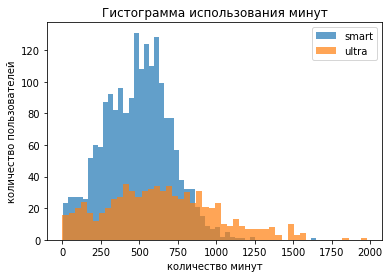

In [13]:
#строим гистограммы по звонкам
plt.hist(df_smart_total['minutes_used'], bins=50, label='smart', alpha=0.7)
plt.hist(df_ultra_total['minutes_used'], bins=50, label='ultra', alpha=0.7)
plt.legend(loc='upper right')
plt.title('Гистограмма использования минут')
plt.xlabel('количество минут')
plt.ylabel('количество пользователей')
plt.show()

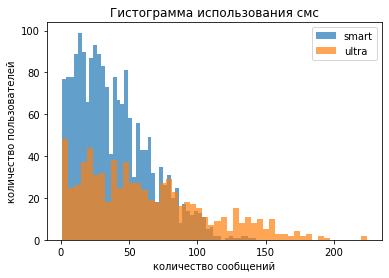

In [14]:
#гистограмма по смс
plt.hist(df_smart_total['sms_used'], bins=50, label='smart', alpha=0.7)
plt.hist(df_ultra_total['sms_used'], bins=50, label='ultra', alpha=0.7)
plt.legend(loc='upper right')
plt.title('Гистограмма использования смс')
plt.xlabel('количество сообщений')
plt.ylabel('количество пользователей')
plt.show()

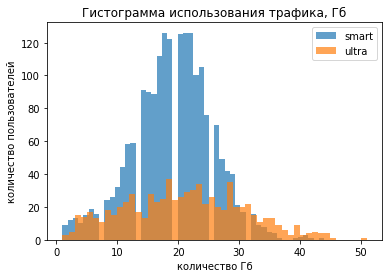

In [15]:
</div>#гистограмма по трафику
plt.hist(df_smart_total['gb_used'], bins=50, label='smart', alpha=0.7)
plt.hist(df_ultra_total['gb_used'], bins=50, label='ultra', alpha=0.7)
plt.legend(loc='upper right')
plt.title('Гистограмма использования трафика, Гб')
plt.xlabel('количество Гб')
plt.ylabel('количество пользователей')
plt.show()

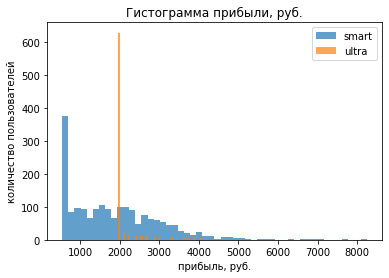

In [16]:
#гистограмма по прибыли
plt.hist(df_smart_total['income_total'], bins=50, label='smart', alpha=0.7)
plt.hist(df_ultra_total['income_total'], bins=50, label='ultra', alpha=0.7)
plt.legend(loc='upper right')
plt.title('Гистограмма прибыли, руб.')
plt.xlabel('прибыль, руб.')
plt.ylabel('количество пользователей')
plt.show()

<b>Вывод:</b> Количество потребляемых услуг в среднем больше на тарифе Ультра. При этом разница в пакетах интернета не такая большая, как используемых минут и сообщений. При этом стандартные отклонения больше на тарифе "Ультра", т.е. пользователи по-разному используют этот тариф.

<u>Гистограммы.</u>
- В случае со звонками распределение по обоим тарифам смещено влево. На обоих тарифах количество пользователей, которым нужно больше 800 минут, относительно невелико.
- Для СМС-сообщений смещение влево выражено ещё больше. Можно сделать вывод, что пользователи нечасто пользуются сообщениями (большинство - до 100 сообщений в месяц).
- Распределение интернет-трафика по обоим тарифам близко к нормальному. При этом на тарифе "Ультра" выше стандартное отклонение, то есть пользователи используют пакет интернета по-разному. Можно сделать предположение, что этим людям мобильный интернет нужен от случая к случаю (например, на даче или в поездках по России).
- Что касается прибыли, то на тарифе "Смарт" несмотря на то, что большинство пользователей ограничиваются ежемесячной абон.платой, достаточно велико количество тех, кто тратит на связь от 1500 до 2000 рублей в месяц. При этом на тарифе "Ультра" подавляющее большинство пользователей укладываются в месячный лимит и не выходят за 2000 рублей в месяц.

## Шаг 4. Проверка гипотез

Необходимо проверить следующие гипотезы:
- средняя выручка пользователей тарифов «Ультра» и «Смарт» различается;
- средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

Начнем с проверки средней выручки.
- <u>Нулевая гипотеза:</u> средняя выручка пользователей тарифа "Ультра" равна средней выручке пользователей тарифа "Смарт"
- <u>Альтернативная гипотеза:</u> средняя выручка пользователей тарифа "Ультра" отличается от средней выручки пользователей тарифа "Смарт"

In [17]:
alpha = .05
#проверяем гипотезу
results = st.ttest_ind(df_smart_total['income_total'], df_ultra_total['income_total'])
print('p-значение: {:.40f}'.format(results.pvalue))
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.0000000428570578032451418196210749574776
Отвергаем нулевую гипотезу


Гипотеза, что средняя выручка по тарифу "Ультра" равна выручке по тарифу "Смарт", не подтвердилась. Теперь проверим вторую гипотезу.
- <u>Нулевая гипотеза:</u> средняя выручка в Москве равна выручке из лругих регионов.
- <u>Альтернативная гипотеза:</u> средняя выручка в Москве отличается от выручки из других регионов.

In [18]:
#отбираем данные по Москве и остальным регионам
moscow_data = total_data.query('city == "Москва"')
regions_data = total_data.query('city != "Москва"')

#проверяем гипотезу
alpha = .05
results = st.ttest_ind(moscow_data['income_total'], regions_data['income_total'])
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.6598516155849514
Не получилось отвергнуть нулевую гипотезу


Нулевая гипотеза подтверждена. Выручка в Москве действительно равна выручке в регионах.

## Шаг 5. Общий вывод

Были проанализированы два тарифа оператора сотовой связи. В ходе анализа рассчитаны основные показатели использования тарифов, проанализировано поведение пользователей и проверены две гипотезы. Выводы:

1) Пользователи тарифа "Ультра" в среднем используют больше звонков и смс, чем пользователи тарифа "Смарт". При этом использование интернета на обоих тарифах отличается незначительно.

2) Дисперсия и стандартное отклонение показателей выше на тарифе "Ультра". Возможно, пользователям данного тарифа весь пакет услуг требуется не каждый месяц, а от случая к случаю (например, на даче или в поездках по России). Второе предположение: среди пользователей данного тарифа есть те, кто не использует пакет услуг полностью и,возможно, не является целевой аудиторией этого тарифа. Эти гипотезы в рамках данного анализа не проверялись. 

3) Средняя выручка по обоим тарифам примерно одинакова. Это означает, что на тарифе "Смарт" люди чаще платят за дополнительные услуги. На тарифе "Ультра", напротив, большинство пользователей ограничиваются ежемесячной платой. При этом средняя доходность тарифов отличается.

4) Средняя выручка по тарифам в Москве не отличается от выручки в регионах.